# Laboratorio 1 - Computación Gráfica
## Integrantes:
### Jose David Barona Hernandez - 1727590
### Jennyfer Belalcazar Manrique - 1925639
### Diego Ledesma - 1928161

# Actividad No. 3 [50%]
Utilizando POO (Programación Orientado a Objetos) implemente una o varias clases en C++, Python o Javascript que cumplan con las siguientes características:

## 3.1
[10%] Modele un vector en R^n, con n en {1,2,3} dimensiones en coordenadas cartesianas.


In [37]:
import numpy as np

In [140]:
class vector:
    def __init__(self, array):
        self.array = np.array(array)
        self.dimension = len(array)
        #print ("Vector created with array: ", self.array)
    
    def getArray(self):
        return self.array

    def getElem(self, index):
        return self.array[index]

    def norm(self):
        n = 0
        for i in range (0, self.dimension):
            n += self.array[i]**2
        return np.sqrt(n) 
    
    #checkDim classmethod can be used as a constructor that
    #verifies the input is a vector of a valid dimension
    @classmethod
    def checkDim(cls, array):
        if (len(array) >= 1 and len(array) <= 3):
            return cls(array)
        else:
            print("Error: Dimension must be 1, 2, or 3")
            return None

In [39]:
vec = vector.checkDim([])
#print(vec.getArray())
vec2 = vector.checkDim([1,2,3])

Error: Dimension must be 1, 2, or 3
Vector created with array:  [1 2 3]


## 3.2
[20%] Implementar las siguientes operaciones


### a. Suma, resta de vectores, y multiplicación de un vector por un escalar.  
### d. División de un vector por un escalar

In [40]:
def scalarVecOp(scalar, vec, op):
    if ( isinstance(scalar, (int, float)) and isinstance(vec, vector) ):
        if op == "+":
            print("Error: scalar and vector addition not supported")
            return None
        elif op == "-":
            print("Error: scalar and vector subtraction not supported")
            return None
        elif op == "*":
            return vector.checkDim(scalar * vec.getArray())
        elif op == "/":
            if scalar == 0:
                print("Error: division by zero not supported")
                return None
            return vector.checkDim( vec.getArray() / scalar )
        else:
            print("Error: Invalid operation")
            return None
    else:
        print("Error: Second argument must be a vector")
        return None

#### Testing

In [41]:
print( "vec2.getArray()", vec2.getArray() )
vec3 = scalarVecOp(3, vec2, "*")
print( "vec3.getArray()", vec3.getArray() )

vec2.getArray() [1 2 3]
Vector created with array:  [3 6 9]
vec3.getArray() [3 6 9]


In [42]:
print( "vec2.getArray()", vec2.getArray() )
vec4 = scalarVecOp(0, vec2, "*")
print( "vec4.getArray()", vec4.getArray() )

vec2.getArray() [1 2 3]
Vector created with array:  [0 0 0]
vec4.getArray() [0 0 0]


In [43]:
print( "vec2.getArray()", vec2.getArray() )
vec5 = scalarVecOp(0, vec2, "/")
print( "isinstance(vec5, vector)", isinstance(vec5, vector) )

vec2.getArray() [1 2 3]
Error: division by zero not supported
isinstance(vec5, vector) False


In [44]:
print( "vec2.getArray()", vec2.getArray() )
vec5 = scalarVecOp(5, vec2, "/")
print( "isinstance(vec5, vector)", isinstance(vec5, vector) )

vec2.getArray() [1 2 3]
Vector created with array:  [0.2 0.4 0.6]
isinstance(vec5, vector) True


### vecOp

In [71]:
#Operaciones entre vectores
def vecOp(vec1, vec2, op):
  if(isinstance(vec1, vector) and isinstance(vec2, vector) ):
    if op=="+":
      return vector.checkDim(vec1.getArray() + vec2.getArray())
    elif op=="-":
      return vector.checkDim(vec1.getArray() - vec2.getArray())
    else:
            print("Error: Invalid operation")
            return None
  else:
        print("Error: Second and first arguments must be a vector")
        return None

#### Testing

In [73]:
#Test
vec1 = vector.checkDim([1,2,3])
vec2 = vector.checkDim([5,2,-10])
vec3 = vecOp(vec1, vec2, "+")
print( "vec3.getArray()", vec3.getArray() )

Vector created with array:  [1 2 3]
Vector created with array:  [  5   2 -10]
Vector created with array:  [ 6  4 -7]
vec3.getArray() [ 6  4 -7]


In [75]:
vec3 = vector.checkDim([1,2,3])
vec4 = vector.checkDim([5,2,-10])
vec5 = vecOp(vec3, vec4, "-")
print( "vec5.getArray()", vec5.getArray() )

Vector created with array:  [1 2 3]
Vector created with array:  [  5   2 -10]
Vector created with array:  [-4  0 13]
vec5.getArray() [-4  0 13]


### b. Multiplicación de vectores (cross product).

In [45]:
def crossProduct(v1, v2):
    if ( isinstance(v1, vector) and isinstance(v2, vector) ):
        if ( v1.dimension != v2.dimension ):
            print("Error: Vectors must be of the same dimension")
            return None
        elif (v1.dimension == 2 and v2.dimension == 2): #Returns a scalar
            return  v1.getElem(0)*v2.getElem(1) - v1.getElem(1)*v2.getElem(0) 
        elif (v1.dimension == 3 and v2.dimension == 3):
            return vector.checkDim([ v1.getElem(1)*v2.getElem(2) - v1.getElem(2)*v2.getElem(1), 
                    v1.getElem(2)*v2.getElem(0) - v1.getElem(0)*v2.getElem(2), 
                    v1.getElem(0)*v2.getElem(1) - v1.getElem(1)*v2.getElem(0) ])
        else:
            print("Error: Cross product only supported for 3D vectors")
            return None
    else:
        print("Error: Both arguments must be vectors")
        return None

In [46]:
#Test cross product
a = np.array([1,0,0])
b = np.array([0,1,0])
aCrossb = np.cross(a,b)
aCrossb

array([0, 0, 1])

In [47]:
veca = vector.checkDim([1,0,0])
vecb = vector.checkDim([0,1,0])
vecCross = crossProduct(veca, vecb)
print( "vecCross.getArray()", vecCross.getArray() )

Vector created with array:  [1 0 0]
Vector created with array:  [0 1 0]
Vector created with array:  [0 0 1]
vecCross.getArray() [0 0 1]


In [48]:
a = np.array([1,0])
b = np.array([0,1])
aCrossb = np.cross(a,b)
aCrossb

array(1)

In [49]:
vE = vector.checkDim([1,0])
vF = vector.checkDim([0,1])
crossEF = crossProduct(vE, vF)
print( "crossEF", crossEF )

Vector created with array:  [1 0]
Vector created with array:  [0 1]
crossEF 1


### c. Producto interno (producto punto)

In [50]:
def dotProduct(v1, v2):
    if ( isinstance(v1, vector) and isinstance(v2, vector) ):
        if ( v1.dimension != v2.dimension ):
            print("Error: Vectors must be of the same dimension")
            return None
        else:
            dotProd = 0
            for i in range (v1.dimension):
                dotProd += v1.getElem(i)*v2.getElem(i)
            return dotProd
    else:
        print("Error: Both arguments must be vectors")
        return None

In [51]:
#Test dot product
a = np.array([1,0,0])
b = np.array([0,1,0])
aDotb = np.dot(a,b)
aDotb

0

In [52]:
veca = vector.checkDim([1,0,0])
vecb = vector.checkDim([0,1,0])
dotProd = dotProduct(veca, vecb)
print( "dotProd", dotProd )

Vector created with array:  [1 0 0]
Vector created with array:  [0 1 0]
dotProd 0


In [53]:
c = np.array([1,2,0])
d = np.array([5,1,3])
cDotd = np.dot(c,d)
cDotd

7

In [54]:
vecC = vector.checkDim([1,2,0])
vecD = vector.checkDim([5,1,3])
dotProd = dotProduct(vecC, vecD)
print( "dotProd", dotProd )

Vector created with array:  [1 2 0]
Vector created with array:  [5 1 3]
dotProd 7


In [55]:
e = np.array([3,2])
f = np.array([1,3])
eDotf = np.dot(e,f)
eDotf

9

In [56]:
vecE = vector.checkDim([3,2])
vecF = vector.checkDim([1,3])
dotProd = dotProduct(vecE, vecF)
print( "dotProd", dotProd )

Vector created with array:  [3 2]
Vector created with array:  [1 3]
dotProd 9


In [57]:
g = np.array([3])
h = np.array([4])
gDoth = np.dot(g,h)
gDoth

12

In [58]:
vecG = vector.checkDim([3])
vecH = vector.checkDim([4])
dotProd = dotProduct(vecG, vecH)
print( "dotProd", dotProd )

Vector created with array:  [3]
Vector created with array:  [4]
dotProd 12


### e. Calcular ángulo entre dos vectores

In [59]:
import math

In [60]:
def angle(v1, v2):
    if ( isinstance(v1, vector) and isinstance(v2, vector) ):
        if ( v1.dimension != v2.dimension ):
            print("Error: Vectors must be of the same dimension")
            return None
        else:
            dotProd = dotProduct(v1, v2)
            normProd = v1.norm() * v2.norm()
            if normProd == 0:
                print("Error: norm of one or both vectors is zero")
                return None
            else:
                return math.acos(dotProd / normProd)
    else:
        print("Error: Both arguments must be vectors")
        return None

#### Testing

In [61]:
#Test angle
a = np.array([1,0,0])
b = np.array([0,1,0])
angleAB = np.arccos(np.dot(a,b) / (np.linalg.norm(a) * np.linalg.norm(b)))
angleAB 

1.5707963267948966

In [62]:
vecA = vector.checkDim([1,0,0])
vecB = vector.checkDim([0,1,0])
angleAB = angle(vecA, vecB)
print( "angleAB", angleAB )

Vector created with array:  [1 0 0]
Vector created with array:  [0 1 0]
angleAB 1.5707963267948966


In [63]:
c = np.array([1,2])
d = np.array([5,1])
angleCD = np.arccos(np.dot(c,d) / (np.linalg.norm(c) * np.linalg.norm(d)))
angleCD

0.9097531579442097

In [64]:
vecC = vector.checkDim([1,2])
vecD = vector.checkDim([5,1])
angleCD = angle(vecC, vecD)
print( "angleCD", angleCD )

Vector created with array:  [1 2]
Vector created with array:  [5 1]
angleCD 0.9097531579442097


### f. Normalización de vectores

In [65]:
def normalize(vec):
    if ( isinstance(vec, vector) ):
        if ( vec.norm() == 0 ):
            print("Error: norm of vector is zero")
            return None
        else:
            return scalarVecOp(vec.norm(), vec, "/")
    else:
        print("Error: Argument must be a vector")
        return None

#### Testing

In [66]:
#Test
a = np.array([5,3,8])
aNorm = a / np.linalg.norm(a)
aNorm

array([0.50507627, 0.30304576, 0.80812204])

In [67]:
vecA = vector.checkDim([5,3,8])
vecANorm = normalize(vecA)
print( "vecANorm", vecANorm.getArray() )

Vector created with array:  [5 3 8]
Vector created with array:  [0.50507627 0.30304576 0.80812204]
vecANorm [0.50507627 0.30304576 0.80812204]


In [68]:
b = np.array([7, 10])
bNorm = b / np.linalg.norm(b)
bNorm

array([0.57346234, 0.81923192])

In [69]:
vecB = vector.checkDim([7, 10])
vecBNorm = normalize(vecB)
print( "vecBNorm", vecBNorm.getArray() )

Vector created with array:  [ 7 10]
Vector created with array:  [0.57346234 0.81923192]
vecBNorm [0.57346234 0.81923192]


## 3.3
[20%] Cree una aplicación que simule el lanzamiento de proyectil en Rn, con n en {1,2,3} se debe considerar

In [227]:
#simulator class receives two vectors of the same dimension (1, 2 or 3):
#initialPosition, initialVelocity.
#and a real number: timeStep

import math
import matplotlib.pyplot as plt
class simulator:

    #self.timeStep is in seconds
    def __init__(self, initialPosition, initialVelocity, timeStep):
        self._initPos = initialPosition
        self._initVel = initialVelocity
        self._timeStep = timeStep
        self._dimension = initialPosition.dimension

        self._currentTime = 0
        self._currentVel = self._initVel
        self._currentPos = self._initPos

        # Each column stores the values for a dimension, and the last column stores the time values.
        # so, each row is a position with its time at the end (right).
        self._trajectory = np.array( [ np.append( self._initPos.getArray(), 0 ) ] )

        if( initialPosition.dimension == 1 ):
            self._gravity = vector.checkDim( [-9.8] )
        elif( initialPosition.dimension == 2 ):
            self._gravity = vector.checkDim( [0, -9.8] )
        elif( initialPosition.dimension == 3 ):
            self._gravity = vector.checkDim( [0, 0, -9.8] )


    
    def tSimulate(self):
        while ( self._currentPos.getElem( self._currentPos.dimension - 1 ) >= 0 ):
            self._currentTime += self._timeStep
            
            self._currentPos = vecOp(self._currentPos, scalarVecOp(self._timeStep, self._currentVel, "*"), "+")
            self._currentVel = vecOp(self._currentVel, scalarVecOp(self._timeStep, self._gravity, "*"), "+")
            self._trajectory = np.append(self._trajectory, [ np.append(self._currentPos.getArray(), self._currentTime) ], axis = 0)
        return self._trajectory

    def hDisR3(self,vec1,vec2):
        return math.sqrt((vec1[0] - vec2[0])**2 + (vec1[1] - vec2[1])**2 ) 

    def finalTime(self):
        return self._trajectory[-1][-1]

    def plotTrayectory(self):
        if( self._dimension == 1 ):
            plt.plot( self._trajectory[:,1], self._trajectory[:,0] )
            plt.xlabel("time [s]")
            plt.ylabel("height [m]")
        elif( self._dimension == 2 ):
            plt.plot( self._trajectory[:,0], self._trajectory[:,1] )
            plt.xlabel("x [m]")
            plt.ylabel("y [m]")
        elif( self._dimension == 3 ):
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.plot( self._trajectory[:,0], self._trajectory[:,1], self._trajectory[:,2] )
            ax.set_xlabel('X [m]')
            ax.set_ylabel('Y [m]')
            ax.set_zlabel('Z [m]')
        plt.show()

    @classmethod
    def checkDim(cls, initialPositionVec, initialVelocityVec, timeStep):
        if ( isinstance(initialPositionVec, vector) and isinstance(initialVelocityVec, vector) ):
            if ( initialPositionVec.dimension != initialVelocityVec.dimension ):
                print("Error: Vectors must be of the same dimension")
                return None
            elif ( initialPositionVec.getElem( 
                    initialPositionVec.dimension - 1 ) < 0 ):
                print("Error: Initial position must be above the ground")
                return None
            else:
                if ( isinstance(timeStep, (int, float)) ):
                    return cls(initialPositionVec, initialVelocityVec, timeStep)
                else:
                    print("Error: timeStep must be a real number")
                    return None
        else:
            print("Error: initial position and initial velocity must be vectors")
            return None
    

In [ ]:
startPos = vector.checkDim([10, 10, 0])
startVel = vector.checkDim([0, 0, 98])
timeStep = 1

sim = simulator.checkDim(startPos, startVel, timeStep)
trajectory = sim.tSimulate()
print( trajectory.shape )
print( trajectory )

In [ ]:
sim.hDisR3(startPos.getArray(),startVel.getArray())

In [224]:
startPosR1 = vector.checkDim([10])
startVelR1 = vector.checkDim([10])
timeStep = 0.2

simR1 = simulator.checkDim(startPosR1, startVelR1, timeStep)
trajectoryR1 = simR1.tSimulate()
print( trajectoryR1.shape )
print( trajectoryR1 )

(16, 2)
[[10.     0.   ]
 [12.     0.2  ]
 [13.608  0.4  ]
 [14.824  0.6  ]
 [15.648  0.8  ]
 [16.08   1.   ]
 [16.12   1.2  ]
 [15.768  1.4  ]
 [15.024  1.6  ]
 [13.888  1.8  ]
 [12.36   2.   ]
 [10.44   2.2  ]
 [ 8.128  2.4  ]
 [ 5.424  2.6  ]
 [ 2.328  2.8  ]
 [-1.16   3.   ]]


In [225]:
simR1.finalTime()

3.0000000000000004

my dim is 1


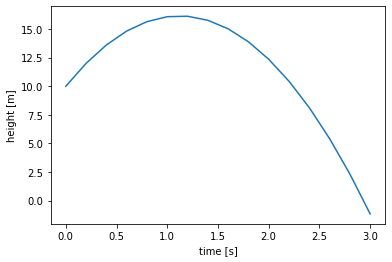

In [210]:
simR1.plotTrayectory()

In [239]:
startPosR2 = vector.checkDim([2, 2])
startVelR2 = vector.checkDim([5, 12])
timeStep = 0.2

simR2 = simulator.checkDim(startPosR2, startVelR2, timeStep)
trajectoryR2 = simR2.tSimulate()
print( trajectoryR2.shape )
print( trajectoryR2 )

(15, 3)
[[ 2.     2.     0.   ]
 [ 3.     4.4    0.2  ]
 [ 4.     6.408  0.4  ]
 [ 5.     8.024  0.6  ]
 [ 6.     9.248  0.8  ]
 [ 7.    10.08   1.   ]
 [ 8.    10.52   1.2  ]
 [ 9.    10.568  1.4  ]
 [10.    10.224  1.6  ]
 [11.     9.488  1.8  ]
 [12.     8.36   2.   ]
 [13.     6.84   2.2  ]
 [14.     4.928  2.4  ]
 [15.     2.624  2.6  ]
 [16.    -0.072  2.8  ]]


In [243]:
simR2.finalTime()

2.8000000000000003

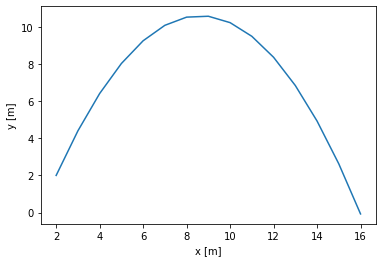

In [244]:
simR2.plotTrayectory()

In [245]:
startPosR3 = vector.checkDim([2, 2, 2])
startVelR3 = vector.checkDim([10, 10, 10])
timeStep = 0.2

simR3 = simulator.checkDim(startPosR3, startVelR3, timeStep)
trajectoryR3 = simR3.tSimulate()
print( trajectoryR3.shape )
print( trajectoryR3 )

(14, 4)
[[ 2.     2.     2.     0.   ]
 [ 4.     4.     4.     0.2  ]
 [ 6.     6.     5.608  0.4  ]
 [ 8.     8.     6.824  0.6  ]
 [10.    10.     7.648  0.8  ]
 [12.    12.     8.08   1.   ]
 [14.    14.     8.12   1.2  ]
 [16.    16.     7.768  1.4  ]
 [18.    18.     7.024  1.6  ]
 [20.    20.     5.888  1.8  ]
 [22.    22.     4.36   2.   ]
 [24.    24.     2.44   2.2  ]
 [26.    26.     0.128  2.4  ]
 [28.    28.    -2.576  2.6  ]]


In [246]:
simR3.finalTime()

2.6

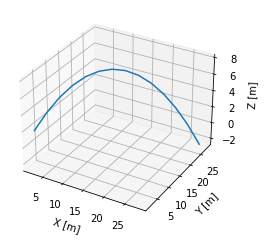

In [247]:
simR3.plotTrayectory()